In [2]:
import pandas as pd
import numpy as ns
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_df=pd.read_csv("train_df.csv")

In [4]:
test_df=pd.read_csv("test_df.csv")

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129061 entries, 0 to 129060
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   year                          129061 non-null  int64 
 1   month                         129061 non-null  int64 
 2   day                           129061 non-null  int64 
 3   order                         129061 non-null  int64 
 4   session_id                    129061 non-null  int64 
 5   colour                        129061 non-null  int64 
 6   location                      129061 non-null  int64 
 7   model_photography             129061 non-null  int64 
 8   price                         129061 non-null  int64 
 9   price_2                       129061 non-null  int64 
 10  page                          129061 non-null  int64 
 11  clothing_model_number         129061 non-null  int64 
 12  session_length                129061 non-null  int64 
 13 

In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32252 entries, 0 to 32251
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   year                          32252 non-null  int64 
 1   month                         32252 non-null  int64 
 2   day                           32252 non-null  int64 
 3   order                         32252 non-null  int64 
 4   session_id                    32252 non-null  int64 
 5   colour                        32252 non-null  int64 
 6   location                      32252 non-null  int64 
 7   model_photography             32252 non-null  int64 
 8   price                         32252 non-null  int64 
 9   price_2                       32252 non-null  int64 
 10  page                          32252 non-null  int64 
 11  clothing_model_number         32252 non-null  int64 
 12  session_length                32252 non-null  int64 
 13  clicks_blouses  

 Numeric features to check for outliers


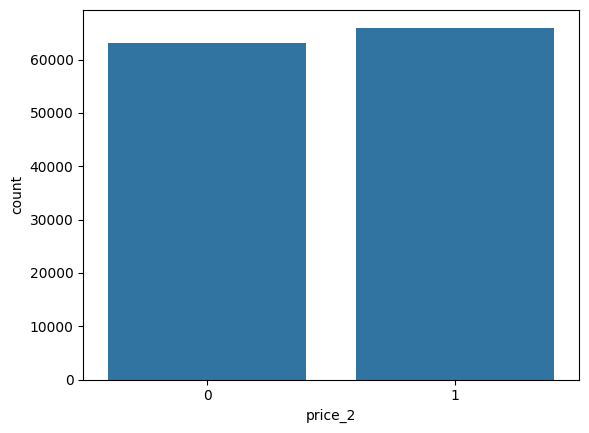

In [5]:

sns.countplot(x='price_2', data=train_df)
plt.show()

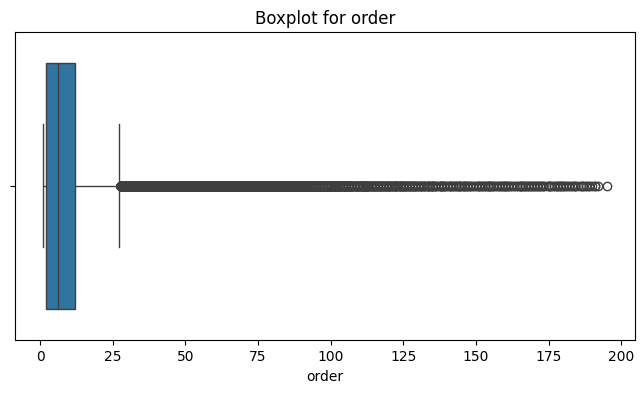

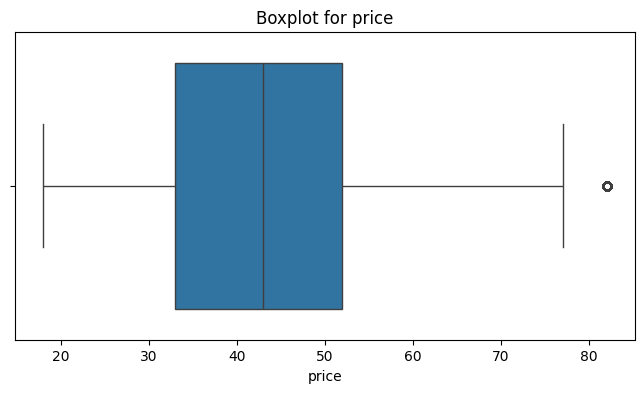

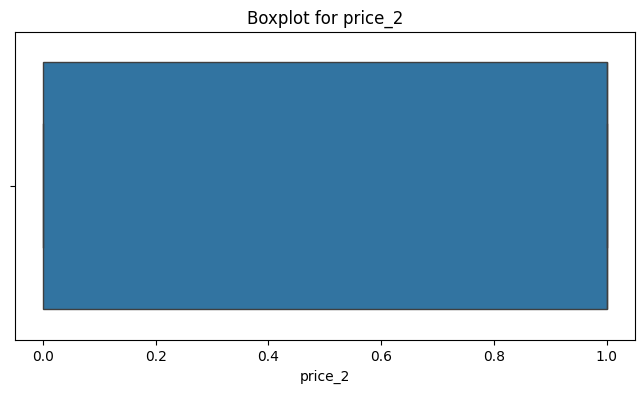

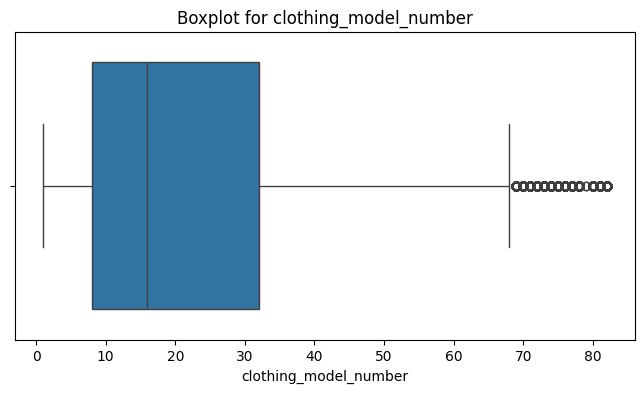

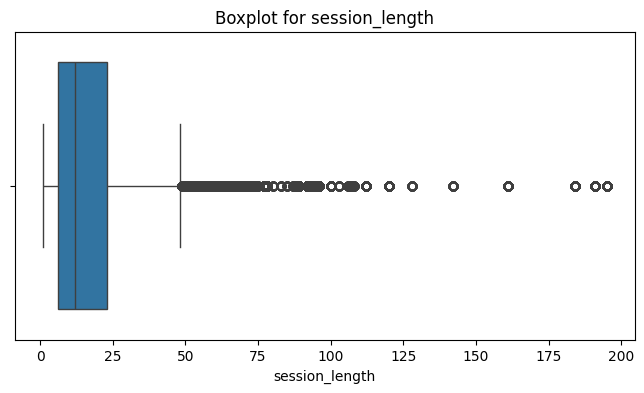

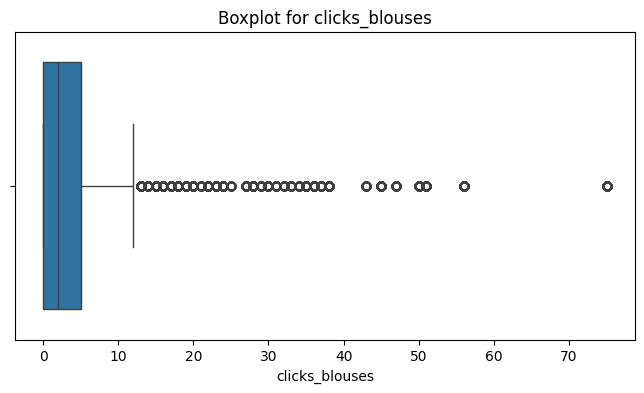

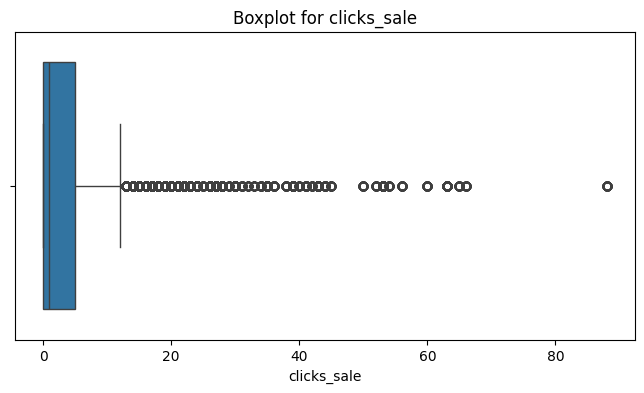

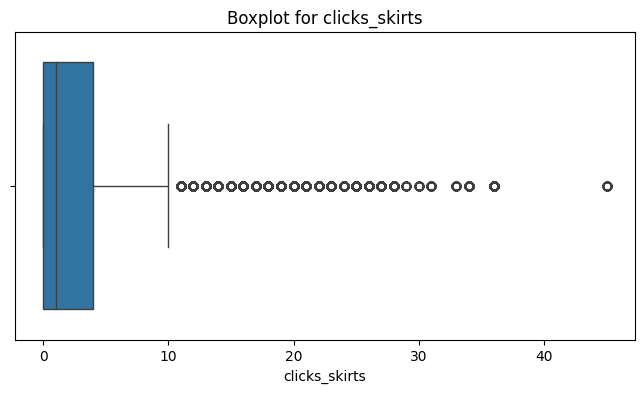

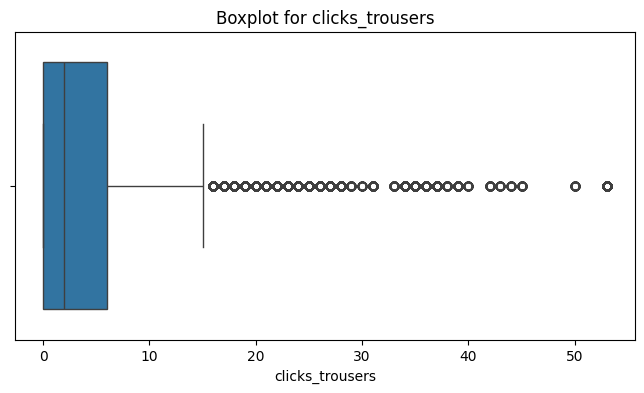

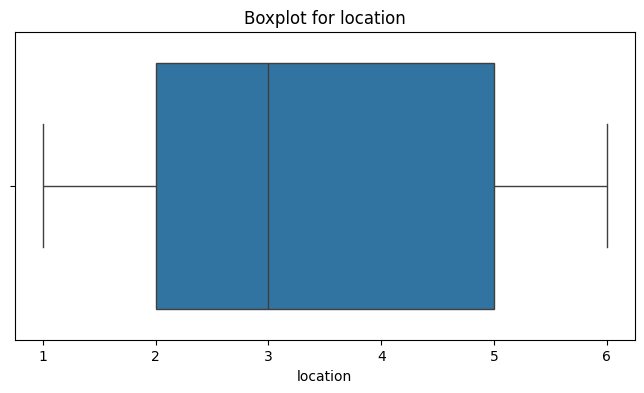

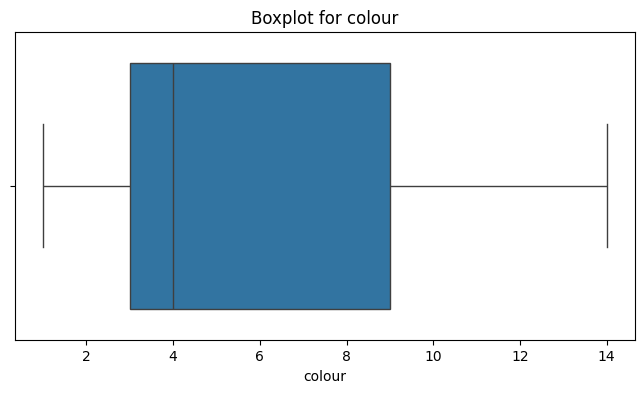

In [29]:
# Numeric features to check for outliers
numeric_features = [
    'order', 'price', 'price_2', 'clothing_model_number', 
    'session_length', 'clicks_blouses', 'clicks_sale', 'clicks_skirts', 
    'clicks_trousers', 'location','colour'
]

# Boxplot for a single numeric feature
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_df[feature])
    plt.title(f"Boxplot for {feature}")
    plt.show()

In [30]:
def iqr_clipping(df, numeric_features):
    for feature in numeric_features:
        Q1 = df[feature].quantile(0.25)  # 25th percentile
        Q3 = df[feature].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1                    # Interquartile range
        
        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Clip the data
        df[feature] = df[feature].clip(lower=lower_bound, upper=upper_bound)
    
    return df


# Apply IQR clipping to train_df
train_df = iqr_clipping(train_df, numeric_features)

# IMPORTANT: Use the same bounds from train_df for test_df
def iqr_clipping_test(test_df, train_df, numeric_features):
    for feature in numeric_features:
        Q1 = train_df[feature].quantile(0.25)  # 25th percentile (from train_df)
        Q3 = train_df[feature].quantile(0.75)  # 75th percentile (from train_df)
        IQR = Q3 - Q1                           # Interquartile range
        
        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Clip the data
        test_df[feature] = test_df[feature].clip(lower=lower_bound, upper=upper_bound)
    
    return test_df

# Apply IQR clipping to test_df using bounds from train_df
test_df = iqr_clipping_test(test_df, train_df, numeric_features)

In [31]:
test_df.shape

(32252, 29)

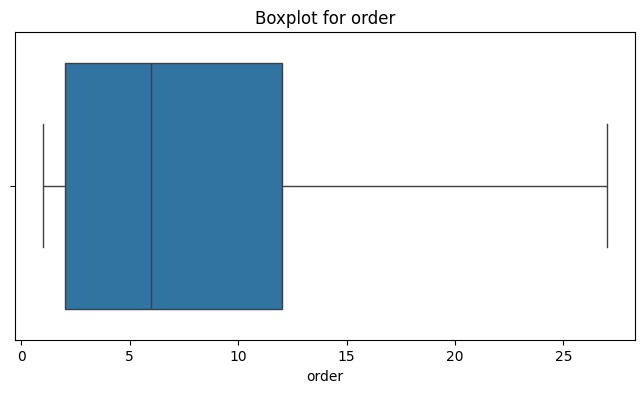

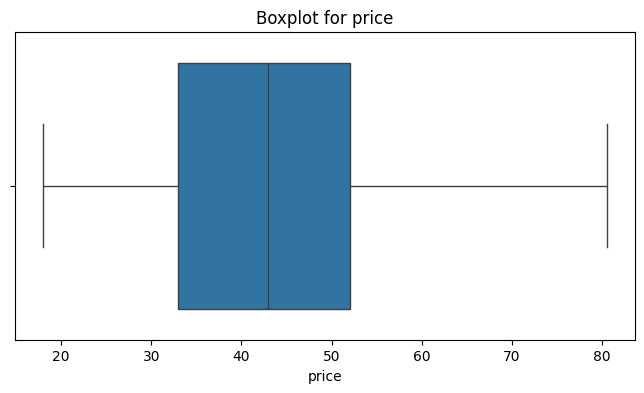

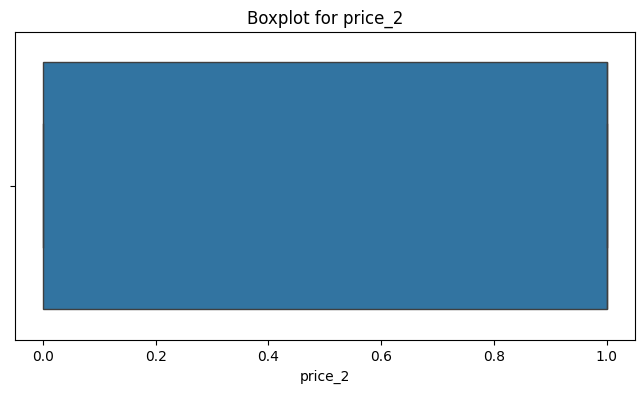

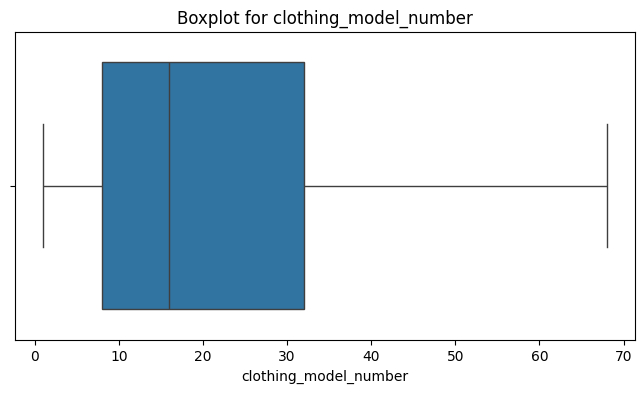

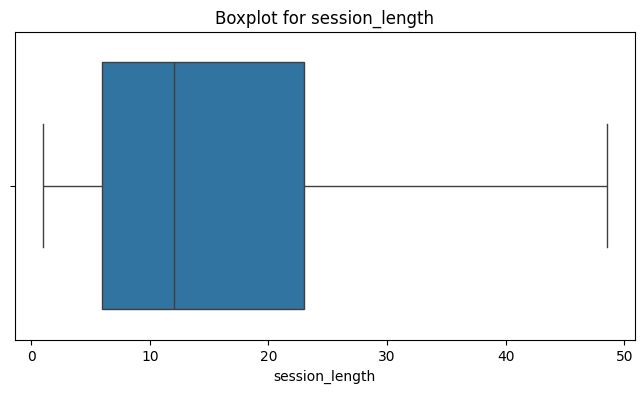

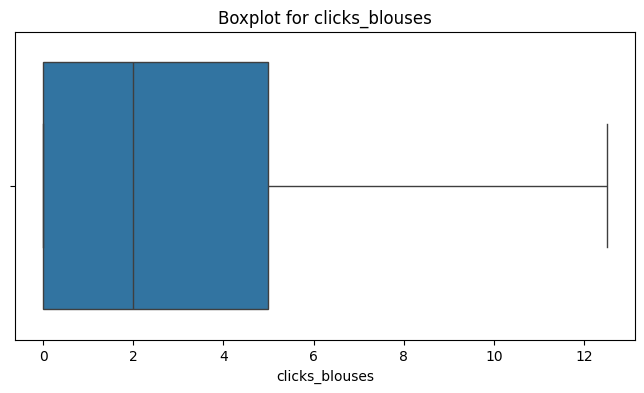

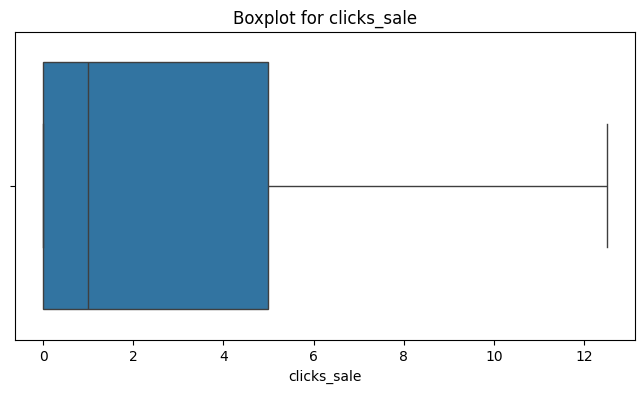

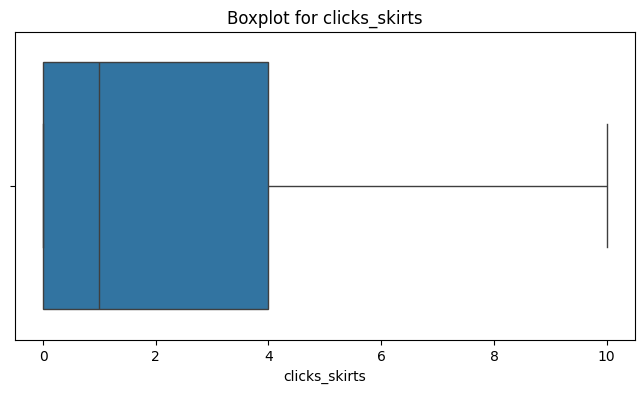

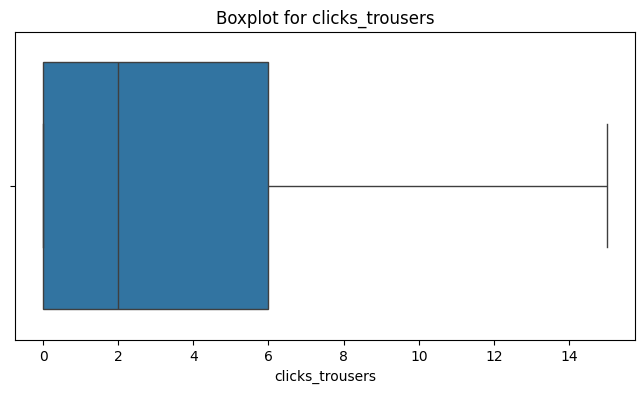

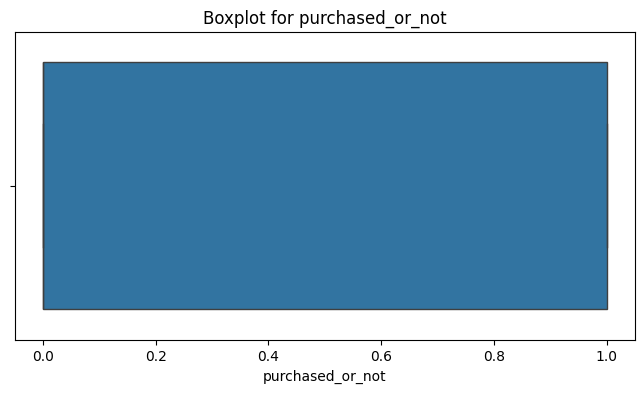

In [32]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Numeric features to check for outliers
numeric_features = [
    'order', 'price', 'price_2', 'clothing_model_number', 
    'session_length', 'clicks_blouses', 'clicks_sale', 'clicks_skirts', 
    'clicks_trousers','purchased_or_not'
]
# Boxplot for a single numeric feature
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_df[feature])
    plt.title(f"Boxplot for {feature}")
    plt.show()


In [33]:
train_df.shape


(129061, 29)

In [34]:
train_df.columns

Index(['year', 'month', 'day', 'order', 'session_id', 'colour', 'location',
       'model_photography', 'price', 'price_2', 'page',
       'clothing_model_number', 'session_length', 'clicks_blouses',
       'clicks_sale', 'clicks_skirts', 'clicks_trousers', 'browsing_path',
       'first_click', 'last_click', 'page1_main_category_blouses',
       'page1_main_category_sale', 'page1_main_category_skirts',
       'page1_main_category_trousers', 'continent_Asia', 'continent_Europe',
       'continent_North America', 'continent_Oceania', 'purchased_or_not'],
      dtype='object')

Bar charts for categorical features

C:\Users\abina\AppData\Local\Temp\ipykernel_19664\2655779859.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=feature, palette='coolwarm')


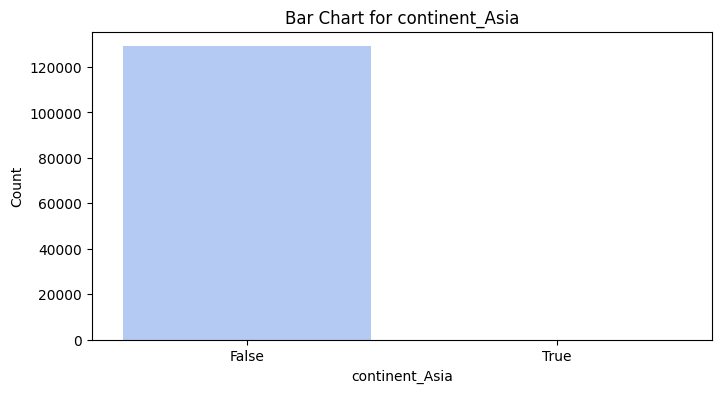

C:\Users\abina\AppData\Local\Temp\ipykernel_19664\2655779859.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=feature, palette='coolwarm')


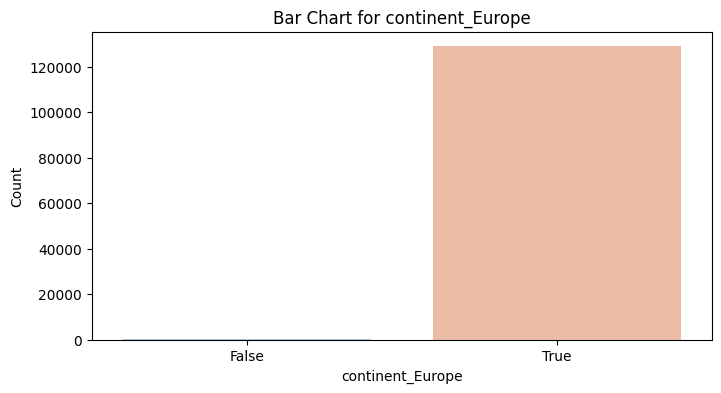

C:\Users\abina\AppData\Local\Temp\ipykernel_19664\2655779859.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=feature, palette='coolwarm')


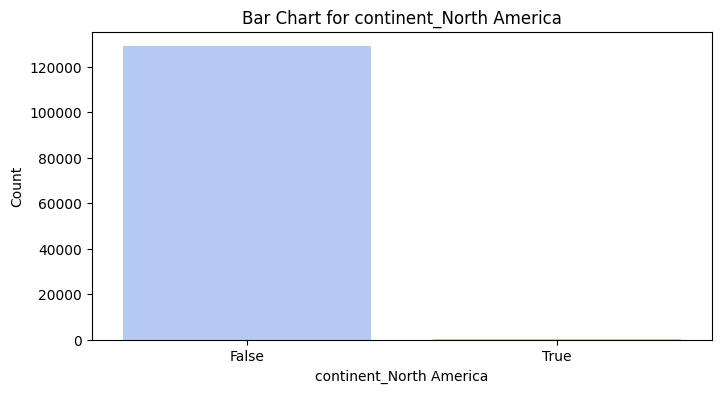

C:\Users\abina\AppData\Local\Temp\ipykernel_19664\2655779859.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=feature, palette='coolwarm')


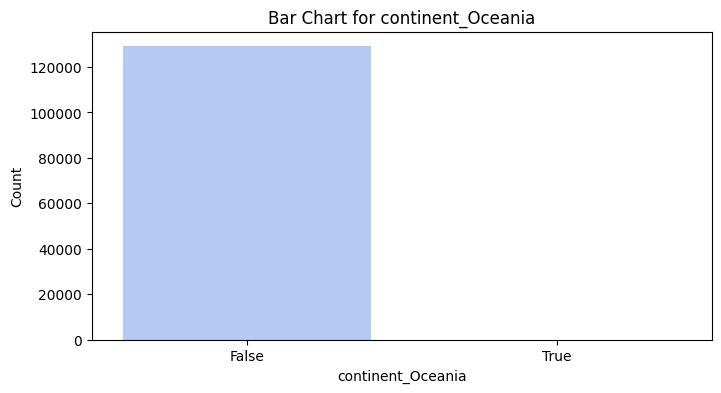

In [35]:
# Bar charts for categorical features
categorical_features = [ 'continent_Asia','continent_Europe', 'continent_North America', 'continent_Oceania']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_df, x=feature, palette='coolwarm')
    plt.title(f"Bar Chart for {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

In [36]:
# List of categorical features to check the count of True/False
categorical_features = ['continent_Asia','continent_Europe', 'continent_North America', 'continent_Oceania']

# Loop through each feature and print the counts of True and False
for feature in categorical_features:
    print(f"Count of True/False for {feature}:")
    print(train_df[feature].value_counts())
    print("\n")

Count of True/False for continent_Asia:
continent_Asia
False    129053
True          8
Name: count, dtype: int64


Count of True/False for continent_Europe:
continent_Europe
True     128900
False       161
Name: count, dtype: int64


Count of True/False for continent_North America:
continent_North America
False    128914
True        147
Name: count, dtype: int64


Count of True/False for continent_Oceania:
continent_Oceania
False    129055
True          6
Name: count, dtype: int64




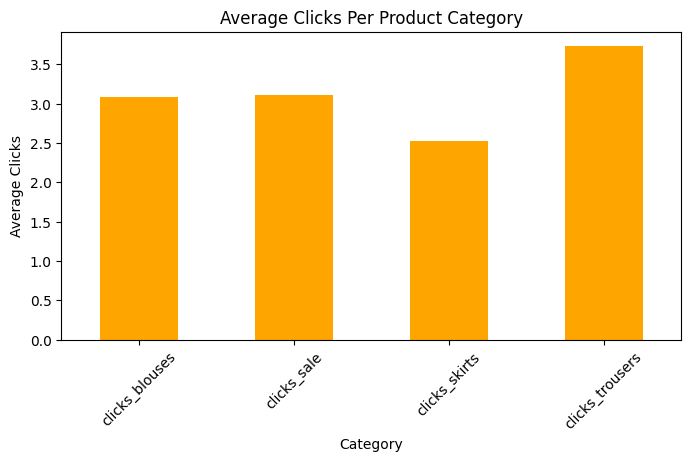

In [37]:
# Page Views Analysis: Average clicks per category
page_views = train_df[['clicks_blouses', 'clicks_sale', 'clicks_skirts', 'clicks_trousers']].mean()
page_views.plot(kind='bar', color='orange', figsize=(8, 4))
plt.title("Average Clicks Per Product Category")
plt.xlabel("Category")
plt.ylabel("Average Clicks")
plt.xticks(rotation=45)
plt.show()

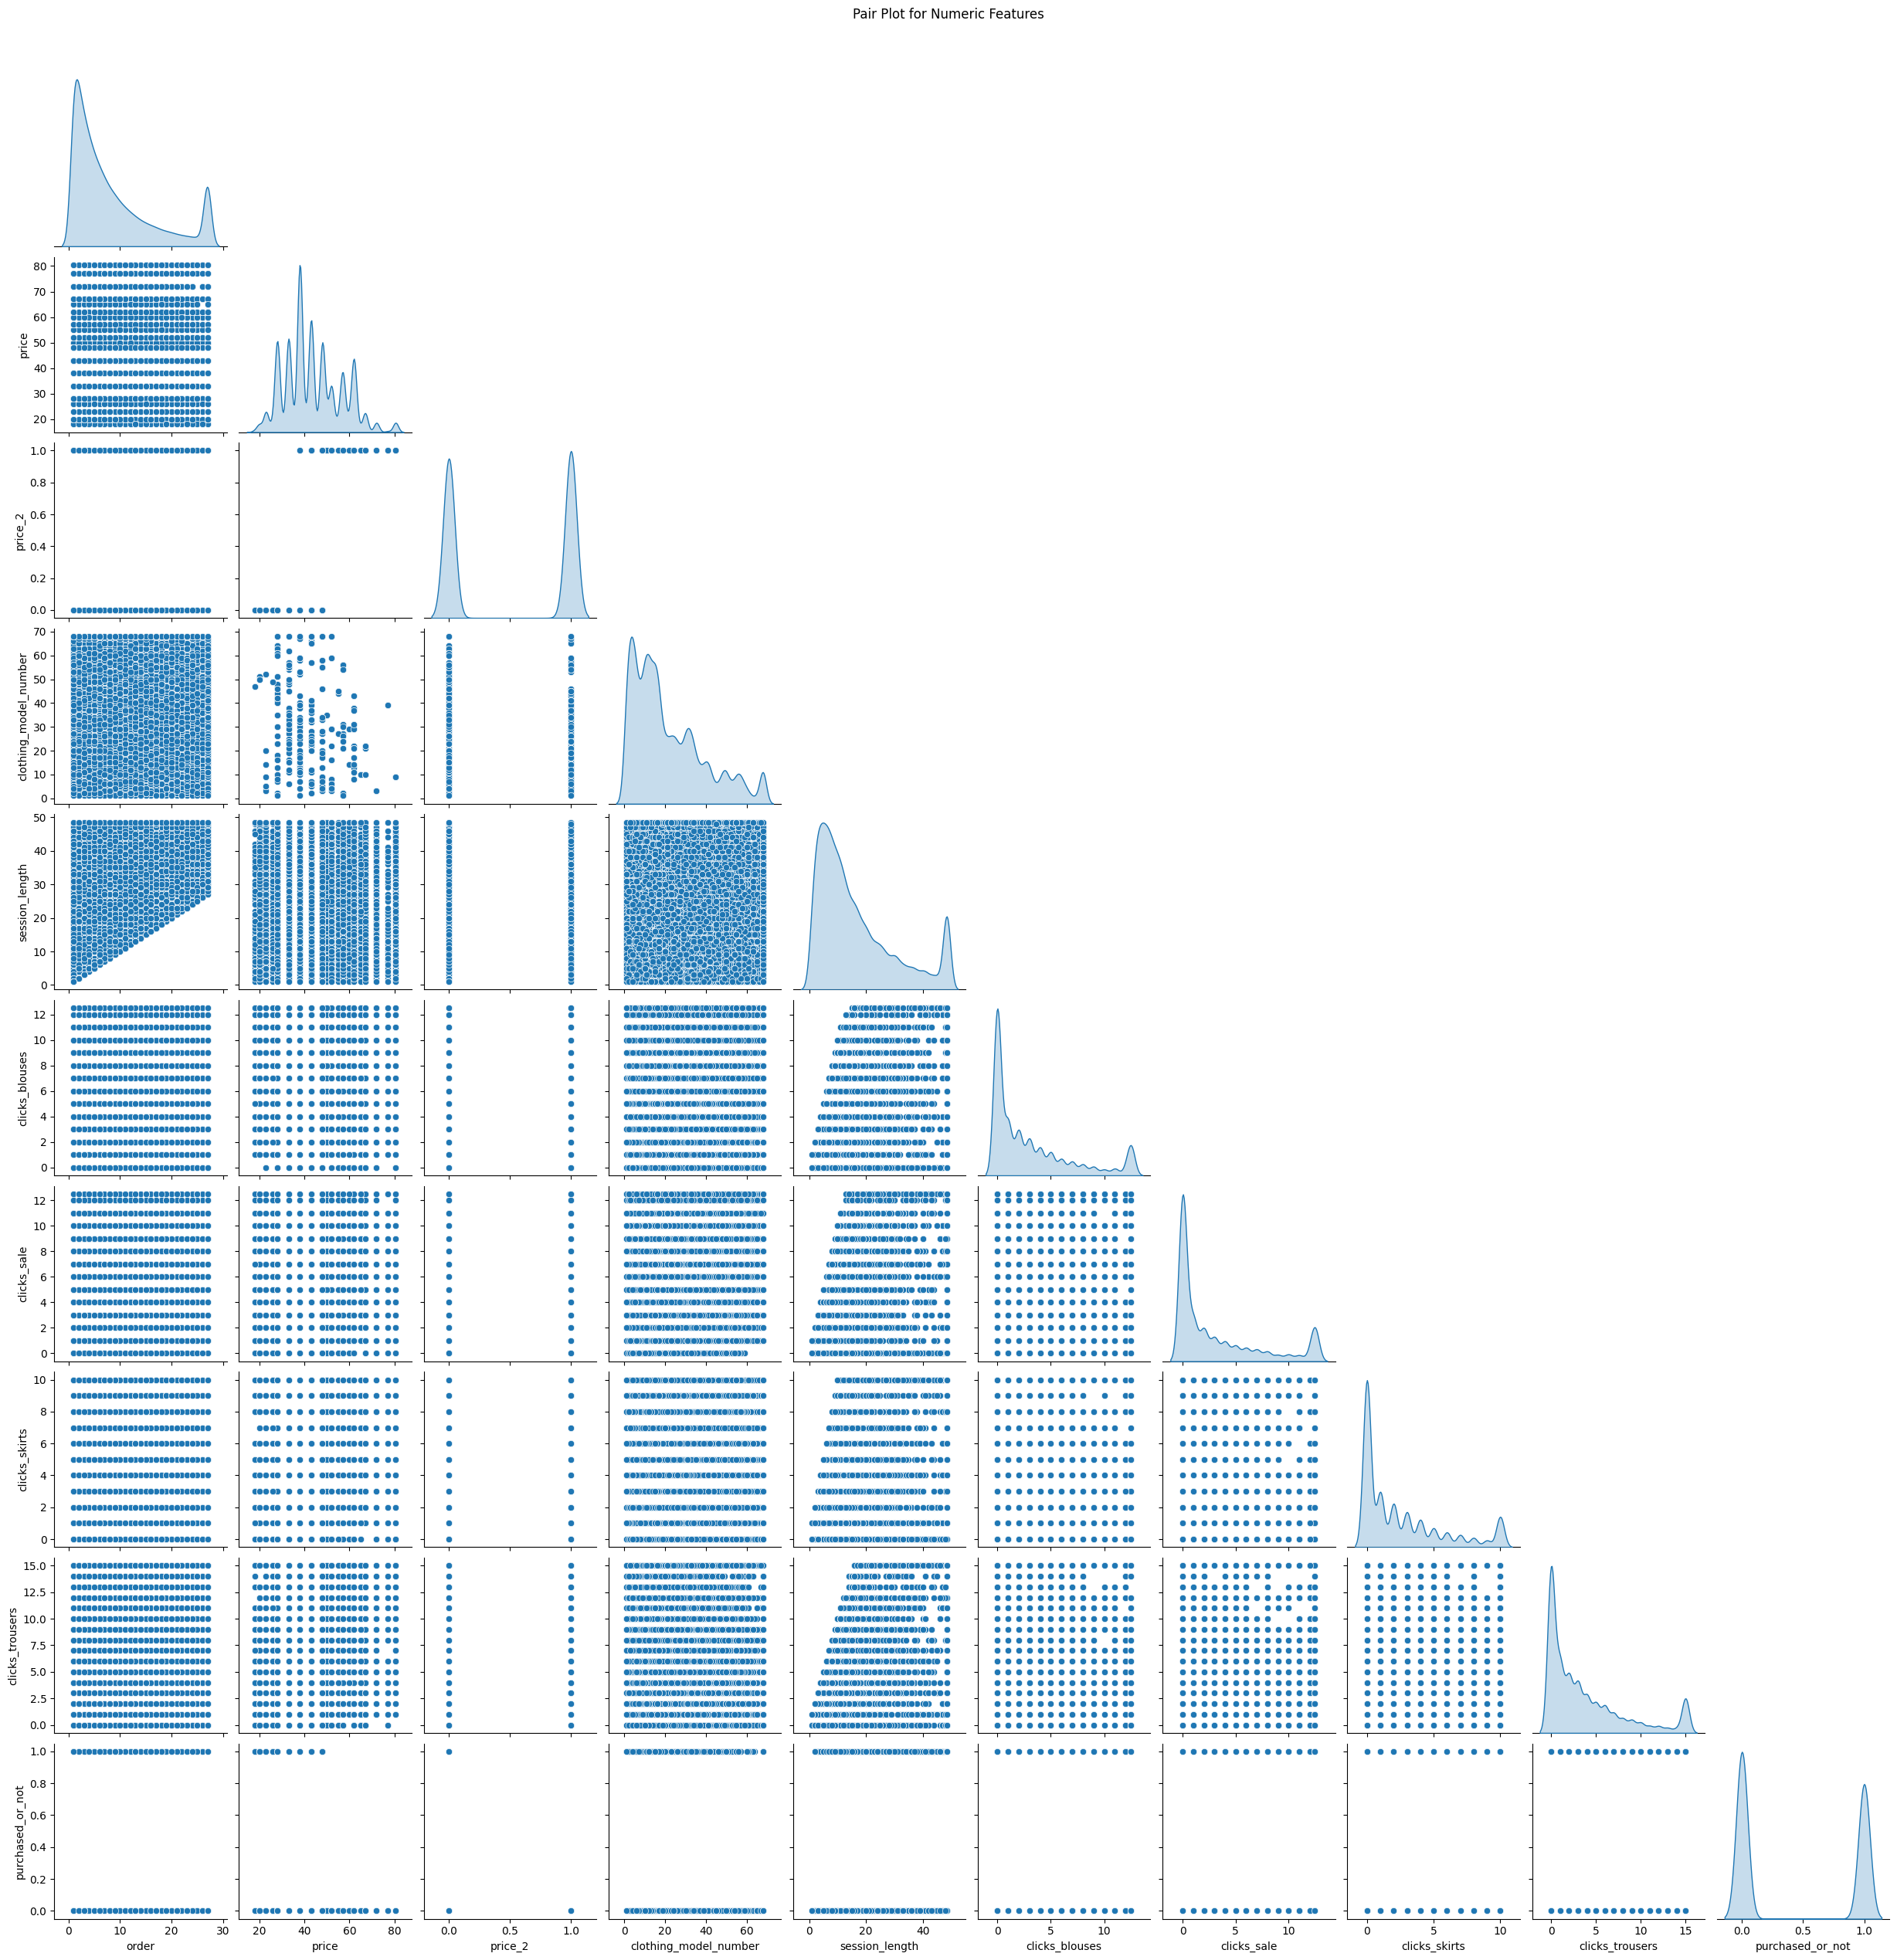

In [38]:
# Pair plots for relationships between numeric features
sns.pairplot(train_df[numeric_features], diag_kind='kde', corner=True)
plt.suptitle("Pair Plot for Numeric Features", y=1.02)
plt.show()

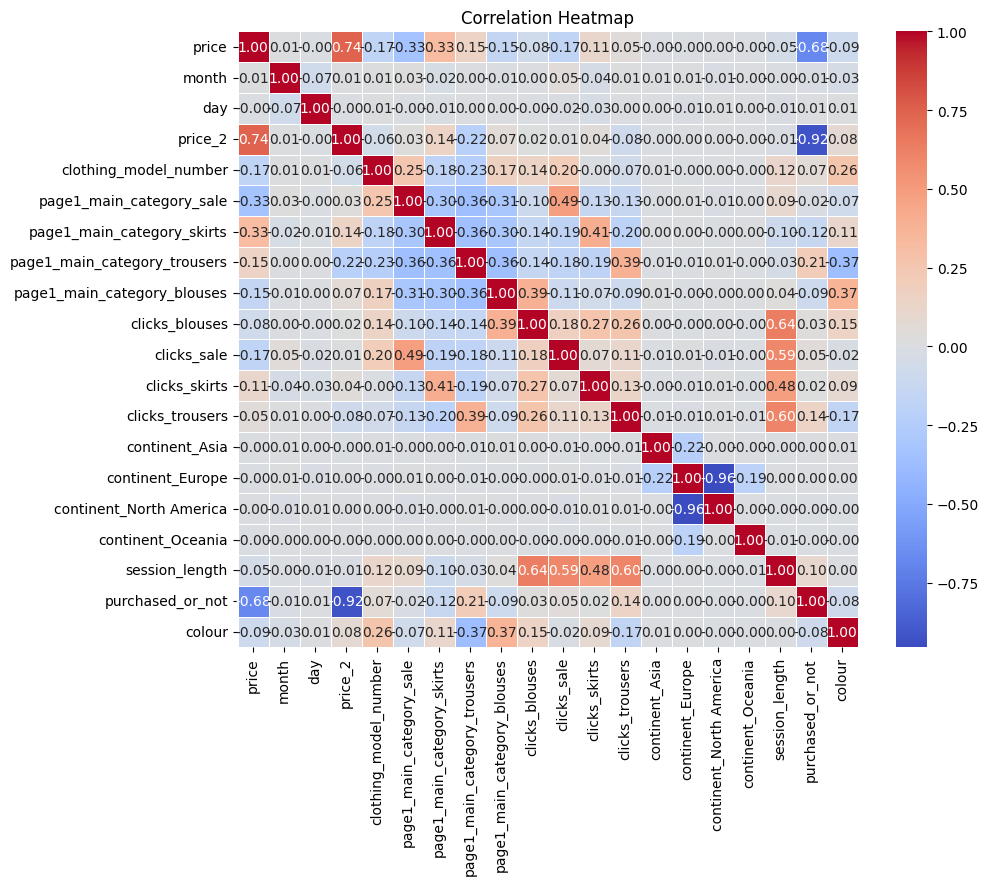

In [39]:
# Correlation matrix for numeric features
co_column = [ 'price','month','day','price_2', 'clothing_model_number', 'page1_main_category_sale', 
    'page1_main_category_skirts', 'page1_main_category_trousers', 'page1_main_category_blouses',
    'clicks_blouses', 'clicks_sale', 'clicks_skirts', 'clicks_trousers', 'continent_Asia',
    'continent_Europe', 'continent_North America', 'continent_Oceania','session_length','purchased_or_not','colour']
correlation_matrix = train_df[co_column].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

C:\Users\abina\AppData\Local\Temp\ipykernel_19664\2579484222.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette='coolwarm')


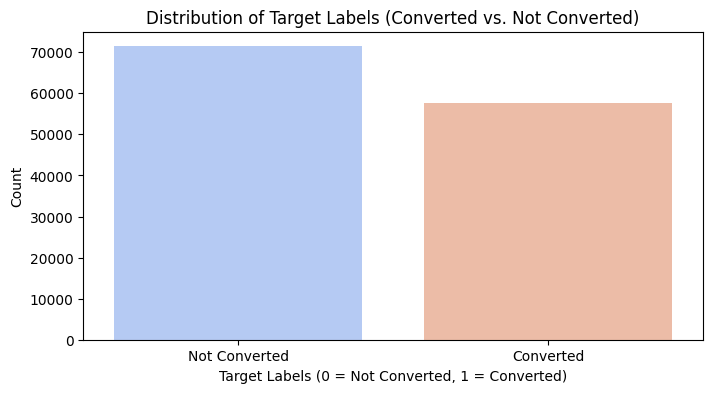

Converted (1): 44.66%
Not Converted (0): 55.34%


In [49]:
# Target variable to analyze
target_variable = 'purchased_or_not'  # Binary column indicating converted (1) vs not converted (0)

# Analyze distribution of the target variable
target_counts = train_df[target_variable].value_counts()

# Plot the distribution of the target variable
plt.figure(figsize=(8, 4))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='coolwarm')
plt.title("Distribution of Target Labels (Converted vs. Not Converted)")
plt.xlabel("Target Labels (0 = Not Converted, 1 = Converted)")
plt.ylabel("Count")
plt.xticks([0, 1], labels=['Not Converted', 'Converted'])
plt.show()

# Calculate and print percentage distribution
total = target_counts.sum()
converted_percentage = (target_counts[1] / total) * 100
not_converted_percentage = (target_counts[0] / total) * 100

print(f"Converted (1): {converted_percentage:.2f}%")
print(f"Not Converted (0): {not_converted_percentage:.2f}%")

Supervised Learning and unsupervised Learning Model Building

In [50]:
# Define task-specific columns
columns_for_regression = [
    'price', 'clothing_model_number', 'page1_main_category_sale', 'page1_main_category_blouses',
    'page1_main_category_skirts', 'page1_main_category_trousers',
    'colour', 'continent_Asia',
    'continent_Europe', 'continent_North America', 'continent_Oceania',

]

columns_for_classification = [ 'continent_Asia',
    'continent_Europe', 'continent_North America','continent_Oceania',
    'session_length','clothing_model_number','page1_main_category_sale', 'page1_main_category_blouses',
    'page1_main_category_skirts', 'page1_main_category_trousers',
    'clicks_sale', 'clicks_skirts', 'clicks_trousers','purchased_or_not'
    
]

columns_for_clustering = [
    'session_length','page1_main_category_sale', 'page1_main_category_blouses',
    'page1_main_category_skirts', 'page1_main_category_trousers', 'continent_Asia',
    'continent_North America', 'continent_Oceania','continent_Europe'
]

# Ensure all selected columns exist in both datasets
train_df, test_df = train_df.align(test_df, join='inner', axis=1)

# Filter datasets for each task
train_regression = train_df[columns_for_regression]
test_regression = test_df[columns_for_regression]

train_classification = train_df[columns_for_classification]
test_classification = test_df[columns_for_classification]

train_clustering = train_df[columns_for_clustering]
test_clustering = test_df[columns_for_clustering]

# Verify shapes
print("Train Regression Shape:", train_regression.shape)
print("Test Regression Shape:", test_regression.shape)
print("Train Classification Shape:", train_classification.shape)
print("Test Classification Shape:", test_classification.shape)
print("Train Clustering Shape:", train_clustering.shape)
print("Test Clustering Shape:", test_clustering.shape)

Train Regression Shape: (129061, 11)
Test Regression Shape: (32252, 11)
Train Classification Shape: (129061, 14)
Test Classification Shape: (32252, 14)
Train Clustering Shape: (129061, 9)
Test Clustering Shape: (32252, 9)


In [51]:
from sklearn.model_selection import train_test_split

# Regression
X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(
    train_regression.drop(columns=['price']),
    train_regression['price'],
    test_size=0.2,  # 20% for validation
    random_state=42
)

# Classification
X_train_clf, X_val_clf, y_train_clf, y_val_clf = train_test_split(
    train_classification.drop(columns=['purchased_or_not']),
    train_classification['purchased_or_not'],
    test_size=0.2,
    random_state=42
)

# Clustering (No labels, so split the features directly)
X_train_clust, X_val_clust = train_test_split(
    train_clustering,
    test_size=0.2,
    random_state=42
)

Pipeline Development:

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

# Define pipeline with RandomForest
regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('model', RandomForestRegressor())  # Use RandomForestRegressor
])

# Fit on training data
regression_pipeline.fit(X_train_reg, y_train_reg)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor())])

In [52]:
# Evaluate on training data
train_preds_reg = regression_pipeline.predict(X_train_reg)

# Evaluate on validation data
val_preds_reg = regression_pipeline.predict(X_val_reg)

# Metrics for training data
train_mae = mean_absolute_error(y_train_reg, train_preds_reg)
train_r2 = r2_score(y_train_reg, train_preds_reg)
train_mse = mean_squared_error(y_train_reg, train_preds_reg)
train_rmse = np.sqrt(train_mse)

# Metrics for validation data
val_mae = mean_absolute_error(y_val_reg, val_preds_reg)
val_r2 = r2_score(y_val_reg, val_preds_reg)
val_mse = mean_squared_error(y_val_reg, val_preds_reg)
val_rmse = np.sqrt(val_mse)

print("Training Data:")
print("MAE:", train_mae)
print("R^2:", train_r2)
print("MSE:", train_mse)
print("RMSE:", train_rmse)

print("\nValidation Data:")
print("MAE:", val_mae)
print("R^2:", val_r2)
print("MSE:", val_mse)
print("RMSE:", val_rmse)

# Test metrics
test_preds_reg = regression_pipeline.predict(test_regression.drop(columns=['price']))
print("\nRegression Test Metrics:")
print("MAE:", mean_absolute_error(test_regression['price'], test_preds_reg))
print("MSE:", mean_squared_error(test_regression['price'], test_preds_reg))
print("R^2:", r2_score(test_regression['price'], test_preds_reg))

Training Data:
MAE: 0.12213824765596254
R^2: 0.9951089758887113
MSE: 0.7612033347583079
RMSE: 0.8724696755522842

Validation Data:
MAE: 0.12171609775603598
R^2: 0.995134735488346
MSE: 0.760236792220648
RMSE: 0.8719155877839597

Regression Test Metrics:
MAE: 0.12675739838370417
MSE: 0.7997383009860836
R^2: 0.9949055937626822


In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Define pipeline
classification_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('model', RandomForestClassifier(n_estimators=300,
                                    max_depth=20,
                                    max_features='sqrt',
                                    class_weight='balanced',
                                    random_state=42))  # Use RandomForestClassifier
                                    ])

# Fit on training data
classification_pipeline.fit(X_train_clf, y_train_clf)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=20,
                                        n_estimators=300, random_state=42))])

In [54]:
# Evaluate on validation data
val_preds_clf = classification_pipeline.predict(X_val_clf)

# Metrics
accuracy = accuracy_score(y_val_clf, val_preds_clf)
precision = precision_score(y_val_clf, val_preds_clf)
recall = recall_score(y_val_clf, val_preds_clf)
conf_matrix = confusion_matrix(y_val_clf, val_preds_clf)

print("Classification Validation Accuracy:", accuracy)
print("Classification Validation Precision:", precision)
print("Classification Validation Recall:", recall)
print("Classification Validation Confusion Matrix:\n", conf_matrix)

# Test metrics
test_preds_clf = classification_pipeline.predict(test_classification.drop(columns=['purchased_or_not']))
print("\nClassification Test Metrics:")
print("Accuracy:", accuracy_score(test_classification['purchased_or_not'], test_preds_clf))
print("Precision:", precision_score(test_classification['purchased_or_not'], test_preds_clf))
print("Recall:", recall_score(test_classification['purchased_or_not'], test_preds_clf))
print("Confution Matrix:",confusion_matrix(test_classification['purchased_or_not'], test_preds_clf))

Classification Validation Accuracy: 0.924262968271801
Classification Validation Precision: 0.9021692896639728
Classification Validation Recall: 0.9294478527607362
Classification Validation Confusion Matrix:
 [[13253  1150]
 [  805 10605]]

Classification Test Metrics:
Accuracy: 0.9326863450328662
Precision: 0.9130053424766765
Recall: 0.9138068635275339
Confution Matrix: [[18631  1091]
 [ 1080 11450]]


In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

# Define pipeline
Logstic_classification_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('model', LogisticRegression(class_weight='balanced',random_state=42, max_iter=1000))  # Use LogisticRegression
])

# Fit on training data
Logstic_classification_pipeline.fit(X_train_clf, y_train_clf)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [56]:
# Evaluate on validation data
val_preds_clf = Logstic_classification_pipeline.predict(X_val_clf)
val_probs_clf = Logstic_classification_pipeline.predict_proba(X_val_clf)[:, 1]  # Predicted probabilities for ROC AUC

# Metrics
accuracy = accuracy_score(y_val_clf, val_preds_clf)
precision = precision_score(y_val_clf, val_preds_clf)
recall = recall_score(y_val_clf, val_preds_clf)
roc_auc = roc_auc_score(y_val_clf, val_probs_clf)
conf_matrix = confusion_matrix(y_val_clf, val_preds_clf)

# Print metrics
print("Classification Validation Accuracy:", accuracy)
print("Classification Validation Precision:", precision)
print("Classification Validation Recall:", recall)
print("Classification Validation ROC AUC:", roc_auc)
print("Classification Validation Confusion Matrix:\n", conf_matrix)

Classification Validation Accuracy: 0.6206175183047302
Classification Validation Precision: 0.5702737940026076
Classification Validation Recall: 0.5750219106047327
Classification Validation ROC AUC: 0.6558543377277459
Classification Validation Confusion Matrix:
 [[9459 4944]
 [4849 6561]]


In [57]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Define a pipeline with StandardScaler and KMeans
clustering_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('kmeans', KMeans(n_clusters = 10 , random_state=42, init='k-means++'))  # Initialize KMeans
])

# Fit the pipeline on the training data
clustering_pipeline.fit(X_train_clust)

Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=10, random_state=42))])

6. Model Evaluation:

In [61]:
# Predict cluster labels for training, validation, and test sets
train_labels = clustering_pipeline.predict(X_train_clust)
val_labels = clustering_pipeline.predict(X_val_clust)
test_labels = clustering_pipeline.predict(test_clustering)

# Add cluster labels to separate copies of the data for summary and analysis
X_train_clust_with_labels = X_train_clust.copy()
X_train_clust_with_labels['cluster'] = train_labels
X_val_clust_with_labels = X_val_clust.copy()
X_val_clust_with_labels['cluster'] = val_labels
test_clustering_with_labels = test_clustering.copy()
test_clustering_with_labels['cluster'] = test_labels

# Calculate mean values for each cluster
cluster_summary = X_train_clust_with_labels.groupby('cluster').mean()
print("Cluster Centers (Mean Values):\n", cluster_summary)

# Calculate silhouette scores using the original feature set (exclude the 'cluster' column)
X_train_clust_scaled = clustering_pipeline.named_steps['scaler'].transform(X_train_clust)
X_val_clust_scaled = clustering_pipeline.named_steps['scaler'].transform(X_val_clust)
X_test_clust_scaled = clustering_pipeline.named_steps['scaler'].transform(test_clustering)

silhouette_avg_train = silhouette_score(X_train_clust_scaled, train_labels)
silhouette_avg_val = silhouette_score(X_val_clust_scaled, val_labels)
silhouette_avg_test = silhouette_score(X_test_clust_scaled, test_labels)

# Print results
print(f"Silhouette Score for Training Data: {silhouette_avg_train}")
print(f"Silhouette Score for Validation Data: {silhouette_avg_val}")
print(f"Silhouette Score for Test Data: {silhouette_avg_test}")

Cluster Centers (Mean Values):
          session_length  page1_main_category_sale  \
cluster                                             
0             37.832275                  1.000000   
1              9.181304                  0.000000   
2             10.380080                  0.000000   
3             14.056166                  0.000000   
4             15.750000                  0.104839   
5              8.000000                  0.000000   
6              4.000000                  0.500000   
7             10.972996                  1.000000   
8             35.800812                  0.000000   
9             38.369602                  0.000000   

         page1_main_category_blouses  page1_main_category_skirts  \
cluster                                                            
0                           0.000000                    0.000000   
1                           0.000000                    0.000000   
2                           1.000000                    0.0

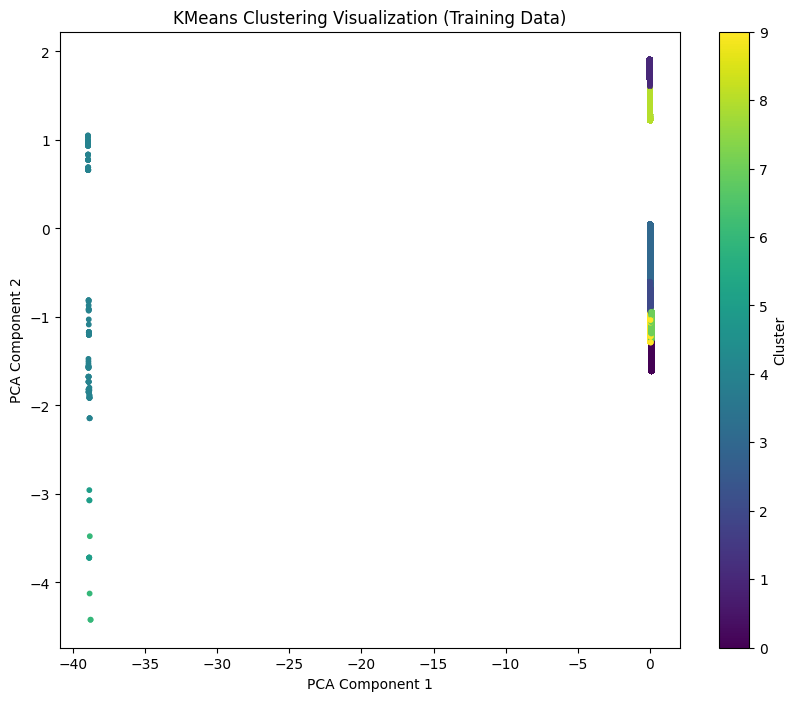

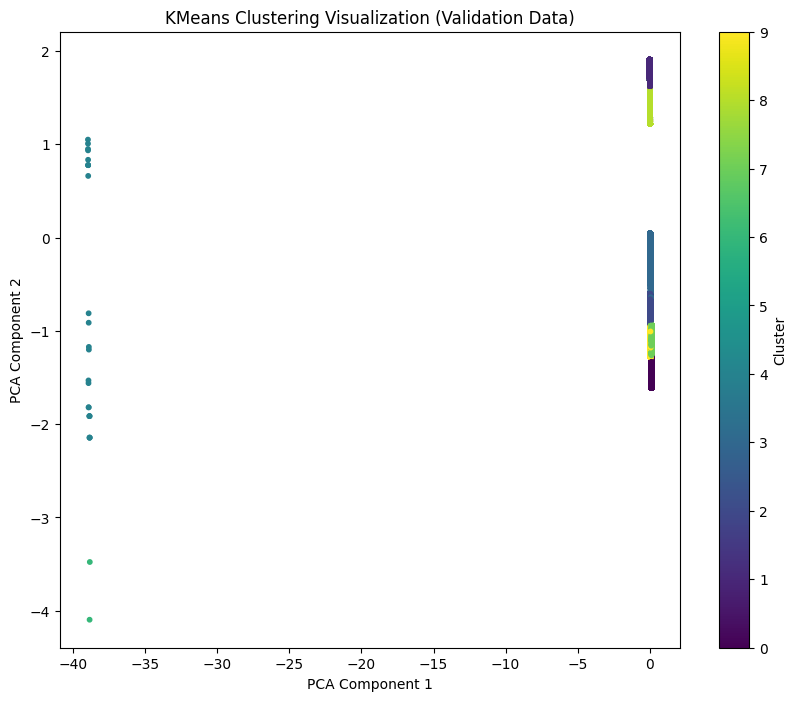

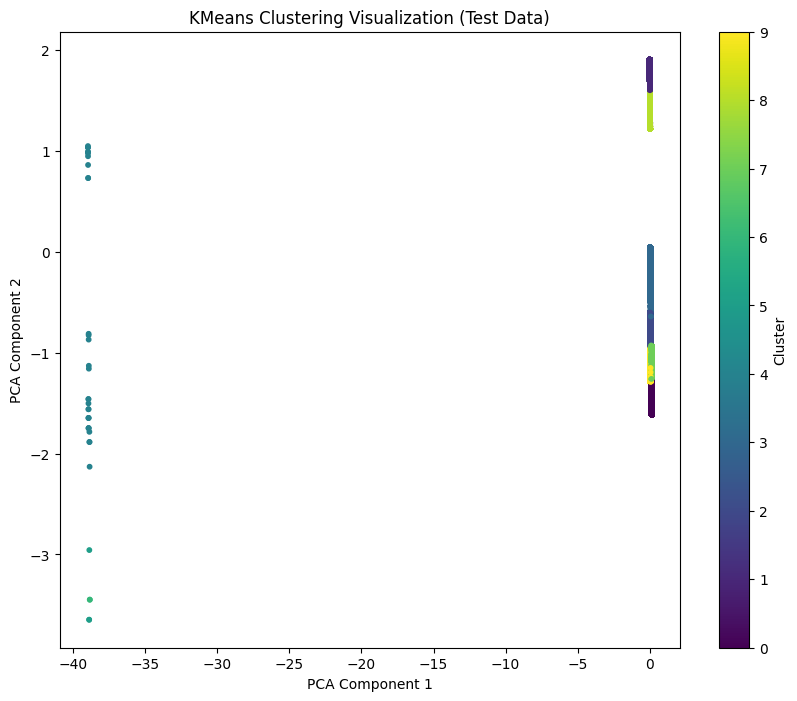

In [62]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensionality of the scaled training data using PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_train_pca = pca.fit_transform(X_train_clust_scaled)

# Visualize clusters on the training data
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=train_labels, cmap='viridis', s=10)
plt.title("KMeans Clustering Visualization (Training Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label='Cluster')
plt.show()

# Scale the validation and test data without modifying the original structure
X_val_clust_scaled = clustering_pipeline.named_steps['scaler'].transform(X_val_clust)
X_test_clust_scaled = clustering_pipeline.named_steps['scaler'].transform(test_clustering)

# Apply PCA to scaled validation and test data
X_val_pca = pca.transform(X_val_clust_scaled)
X_test_pca = pca.transform(X_test_clust_scaled)

# Visualize clusters on validation data
plt.figure(figsize=(10, 8))
scatter_val = plt.scatter(X_val_pca[:, 0], X_val_pca[:, 1], c=val_labels, cmap='viridis', s=10)
plt.title("KMeans Clustering Visualization (Validation Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter_val, label='Cluster')
plt.show()

# Visualize clusters on test data
plt.figure(figsize=(10, 8))
scatter_test = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=test_labels, cmap='viridis', s=10)
plt.title("KMeans Clustering Visualization (Test Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter_test, label='Cluster')
plt.show()

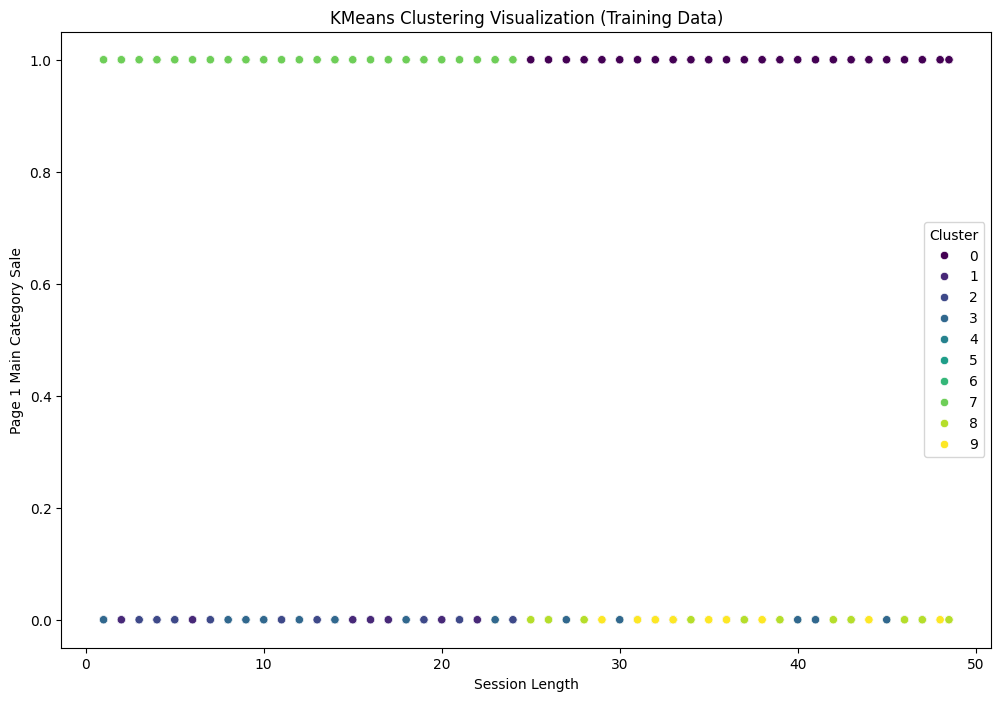

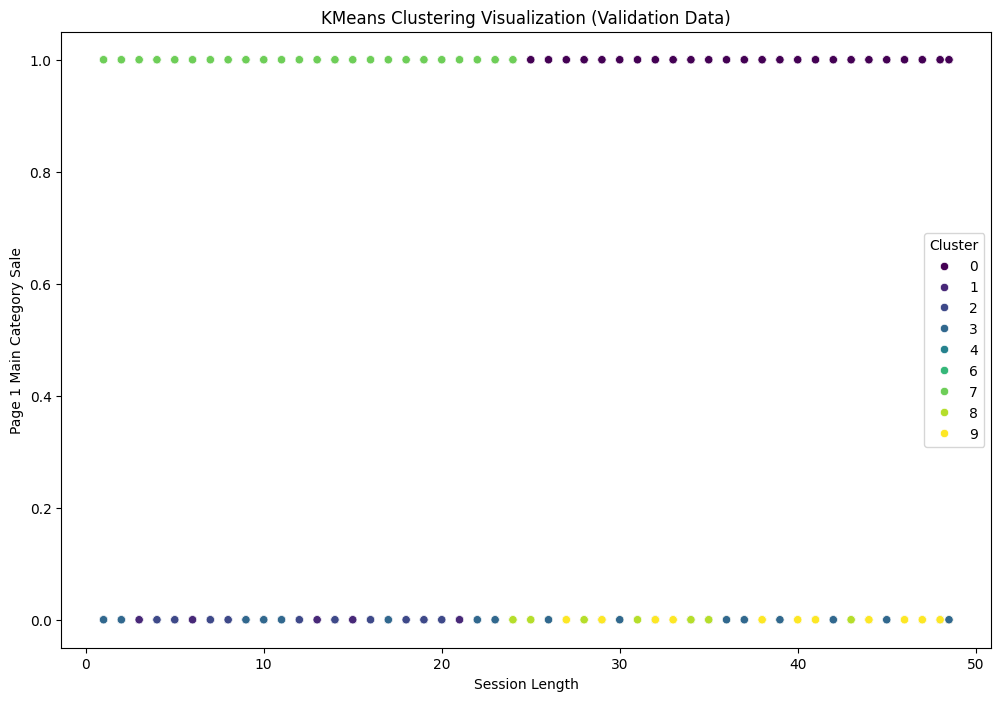

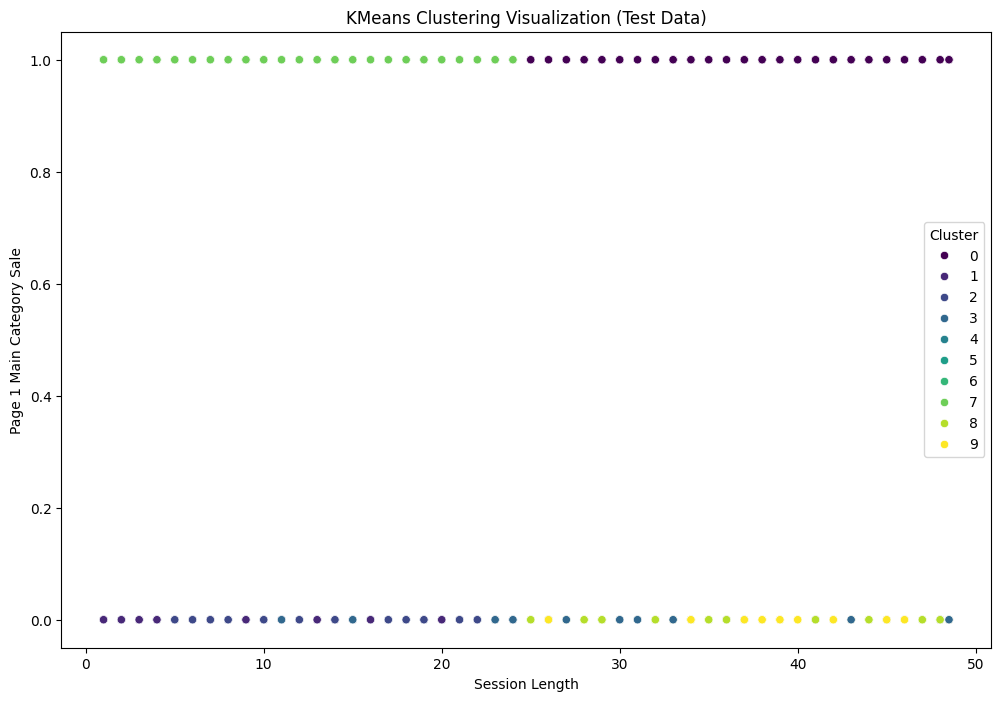

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize KMeans clusters on the training data
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=X_train_clust['session_length'],
    y=X_train_clust['page1_main_category_sale'],
    hue=train_labels,
    palette='viridis',
    legend='full'
)
plt.title("KMeans Clustering Visualization (Training Data)")
plt.xlabel("Session Length")
plt.ylabel("Page 1 Main Category Sale")
plt.legend(title='Cluster')
plt.show()

# Visualize KMeans clusters on the validation data
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=X_val_clust['session_length'],
    y=X_val_clust['page1_main_category_sale'],
    hue=val_labels,
    palette='viridis',
    legend='full'
)
plt.title("KMeans Clustering Visualization (Validation Data)")
plt.xlabel("Session Length")
plt.ylabel("Page 1 Main Category Sale")
plt.legend(title='Cluster')
plt.show()

# Visualize KMeans clusters on the test data
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=test_clustering['session_length'],
    y=test_clustering['page1_main_category_sale'],
    hue=test_labels,
    palette='viridis',
    legend='full'
)
plt.title("KMeans Clustering Visualization (Test Data)")
plt.xlabel("Session Length")
plt.ylabel("Page 1 Main Category Sale")
plt.legend(title='Cluster')
plt.show()

In [ ]:
# from sklearn.metrics import silhouette_score

# scores = []
# for k in range(2, 16):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     labels = kmeans.fit_predict(X_train_clust_scaled)
#     score = silhouette_score(X_train_clust_scaled, labels)
#     scores.append(score)

# plt.plot(range(2, 16), scores, marker='o')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.title('Optimal Number of Clusters')
# plt.show()

MLFLOW 

In [68]:
%pip install mlflow

Note: you may need to restart the kernel to use updated packages.


In [81]:
import mlflow
from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_error, 
    accuracy_score, precision_score, recall_score, 
    confusion_matrix, roc_auc_score, silhouette_score
)

# Set MLflow tracking URI and experiment
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Customer Conversion Analysis Unified Experiment for All Models")


def log_model_and_metrics(model, model_name, task_type, X_train, y_train=None, 
                          X_val=None, y_val=None, test_data=None, params=None):
    """
    Logs the model, metrics, and artifacts to MLflow.
    
    Parameters:
        - model: Machine learning model or pipeline.
        - model_name: Name of the model.
        - task_type: "regression", "classification", or "clustering".
        - X_train, y_train: Training data and labels.
        - X_val, y_val: Validation data and labels (optional for clustering).
        - test_data: Test data (dict with 'features' and 'labels' keys).
        - params: Hyperparameters to log.
    """
    with mlflow.start_run(run_name=model_name) as run:
        # Fit model
        model.fit(X_train, y_train if y_train is not None else None)

        # Log parameters
        if params:
            mlflow.log_params(params)

        if task_type == "regression":
            # Predict and calculate metrics
            val_preds = model.predict(X_val)
            test_preds = model.predict(test_data['features'])

            metrics = {
                "val_mae": mean_absolute_error(y_val, val_preds),
                "val_r2": r2_score(y_val, val_preds),
                "val_rmse": np.sqrt(mean_squared_error(y_val, val_preds)),
                "test_mae": mean_absolute_error(test_data['labels'], test_preds),
                "test_r2": r2_score(test_data['labels'], test_preds),
                "test_rmse": np.sqrt(mean_squared_error(test_data['labels'], test_preds)),
            }
            mlflow.log_metrics(metrics)

        elif task_type == "classification":
            # Predict and calculate metrics
            val_preds = model.predict(X_val)
            val_probs = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None

            test_preds = model.predict(test_data['features'])
            test_probs = model.predict_proba(test_data['features'])[:, 1] if hasattr(model, "predict_proba") else None

            metrics = {
                "val_accuracy": accuracy_score(y_val, val_preds),
                "val_precision": precision_score(y_val, val_preds),
                "val_recall": recall_score(y_val, val_preds),
                "val_roc_auc": roc_auc_score(y_val, val_probs) if val_probs is not None else None,
                "test_accuracy": accuracy_score(test_data['labels'], test_preds),
                "test_precision": precision_score(test_data['labels'], test_preds),
                "test_recall": recall_score(test_data['labels'], test_preds),
                "test_roc_auc": roc_auc_score(test_data['labels'], test_probs) if test_probs is not None else None,
            }
            mlflow.log_metrics({k: v for k, v in metrics.items() if v is not None})

        elif task_type == "clustering":
            # Handle 'cluster' column if it exists in test data
            if test_data and "features" in test_data:
                if "cluster" in test_data["features"].columns:
                    test_data["features"] = test_data["features"].drop(columns=["cluster"])

            # Get scaled data directly
            X_train_scaled = model.named_steps['scaler'].transform(X_train)
            X_val_scaled = model.named_steps['scaler'].transform(X_val)
            X_test_scaled = model.named_steps['scaler'].transform(test_data['features'])

            # Make predictions
            train_labels = model.predict(X_train)
            val_labels = model.predict(X_val)
            test_labels = model.predict(test_data['features'])

            # Calculate metrics on scaled data
            metrics = {
                "train_silhouette": silhouette_score(X_train_scaled, train_labels),
                "val_silhouette": silhouette_score(X_val_scaled, val_labels),
                "test_silhouette": silhouette_score(X_test_scaled, test_labels),
            }
            mlflow.log_metrics(metrics)

            # Visualization
            pca = PCA(n_components=2)
            X_train_pca = pca.fit_transform(X_train_scaled)
            plt.figure(figsize=(8, 6))
            plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=train_labels, cmap='viridis', s=10)
            plt.title(f"Clustering Visualization: {model_name}")
            plt.xlabel("PCA Component 1")
            plt.ylabel("PCA Component 2")
            plt.colorbar(label='Cluster')
            plt.savefig("cluster_visualization.png")
            plt.close()
            mlflow.log_artifact("cluster_visualization.png")

            

        # Log the model
        mlflow.sklearn.log_model(model, artifact_path="model")
        print(f"Model {model_name} logged successfully! Run ID: {run.info.run_id}")
        return run.info.run_id

2025/01/29 14:07:59 INFO mlflow.tracking.fluent: Experiment with name 'Customer Conversion Analysis Unified Experiment for All Models' does not exist. Creating a new experiment.


In [82]:
def register_model(run_id, model_name):
    """
    Registers the model with the MLflow model registry.
    """
    model_uri = f"runs:/{run_id}/model"
    registered_model = mlflow.register_model(model_uri=model_uri, name=model_name)
    print(f"Model {model_name} registered successfully! Version: {registered_model.version}")

In [83]:
# Log Regression Model
run_id_1 = log_model_and_metrics(
    regression_pipeline, "Random Forest Regressor", "regression",
    X_train_reg, y_train_reg, X_val_reg, y_val_reg,
    test_data={'features': test_regression.drop(columns=['price']), 'labels': test_regression['price']},
    params={"n_estimators": 100, "max_depth": None}
)


# Log Classification Model

run_id_2 = log_model_and_metrics(
    classification_pipeline, "Random Forest Classifier", "classification",
    X_train_clf, y_train_clf, X_val_clf, y_val_clf,
    test_data={'features': test_classification.drop(columns=['purchased_or_not']), 'labels': test_classification['purchased_or_not']},
    params = {
    "n_estimators": 300,
    "max_depth": 20,
    "max_features": "sqrt",
    "class_weight": "balanced",
    "random_state": 42
}

)

# Log Clustering Model
run_id_3 = log_model_and_metrics(
    clustering_pipeline, "KMeans Clustering", "clustering",
    X_train_clust, X_val=X_val_clust,
    test_data={'features': test_clustering},
    params={"n_clusters": 12 }
)

2025/01/29 14:08:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model Random Forest Regressor logged successfully! Run ID: 60c3ff6ae1f5400ba7fc72976d6b92b1
🏃 View run Random Forest Regressor at: http://127.0.0.1:5000/#/experiments/364253872368824417/runs/60c3ff6ae1f5400ba7fc72976d6b92b1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/364253872368824417


2025/01/29 14:09:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model Random Forest Classifier logged successfully! Run ID: 23870db4c1b64d6894985ee0944aacb7
🏃 View run Random Forest Classifier at: http://127.0.0.1:5000/#/experiments/364253872368824417/runs/23870db4c1b64d6894985ee0944aacb7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/364253872368824417


2025/01/29 14:13:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model KMeans Clustering logged successfully! Run ID: 8ee0c172f28d47039382386e5e6cdb9c
🏃 View run KMeans Clustering at: http://127.0.0.1:5000/#/experiments/364253872368824417/runs/8ee0c172f28d47039382386e5e6cdb9c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/364253872368824417


In [84]:
# Registering all the models
register_model(run_id_1, "Random Forest Regressor")

Successfully registered model 'Random Forest Regressor'.
2025/01/29 14:16:54 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest Regressor, version 1


Model Random Forest Regressor registered successfully! Version: 1


Created version '1' of model 'Random Forest Regressor'.


In [85]:
register_model(run_id_2, "Random Forest Classifier")

Successfully registered model 'Random Forest Classifier'.
2025/01/29 14:16:56 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest Classifier, version 1


Model Random Forest Classifier registered successfully! Version: 1


Created version '1' of model 'Random Forest Classifier'.


In [86]:
register_model(run_id_3, "KMeans Clustering")


Successfully registered model 'KMeans Clustering'.
2025/01/29 14:16:57 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: KMeans Clustering, version 1


Model KMeans Clustering registered successfully! Version: 1


Created version '1' of model 'KMeans Clustering'.


In [ ]:
! streamlit run app.py